In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
replace_dict = {
    "MPNN_global_pm": "MPNN$_{chiral}$",
    "MPNN_global_pm_no_ctag": "MPNN$_{pm}$",
    "MPNN_ctag": "MPPN$_{ctag}$",
    "MPNN_no_chiral": "MPNN$_{nochiral}$",
    "RF_no_pm": "RF$_{achiral}$",
    "RF_pm": "RF$_{chiral}$",
    "GB_no_pm": "GB$_{achiral}$",
    "GB_pm": "GB$_{chiral}$",
    "Chiral": "MPNN$_{pm}$",
    "Nonchiral": "MPNN$_{nochiral}$"
}

replace_var_dict = {"Tm_MAE": "T$_{m}$ MAE", "Tg_MAE": "T$_{g}$ MAE", "Tg_RMSE": "T$_{g}$ RMSE", "Tm_RMSE": "T$_{m}$ RMSE"}

# Get Demonstration of MPNN Chiral Vs. Achiral

In [6]:
# ind_df.to_csv("individual_df.csv", index=False)
ind_df = pd.read_csv("data/full_err_All_df.csv")

KeyError: 'MPNN_RBF_dblPm'

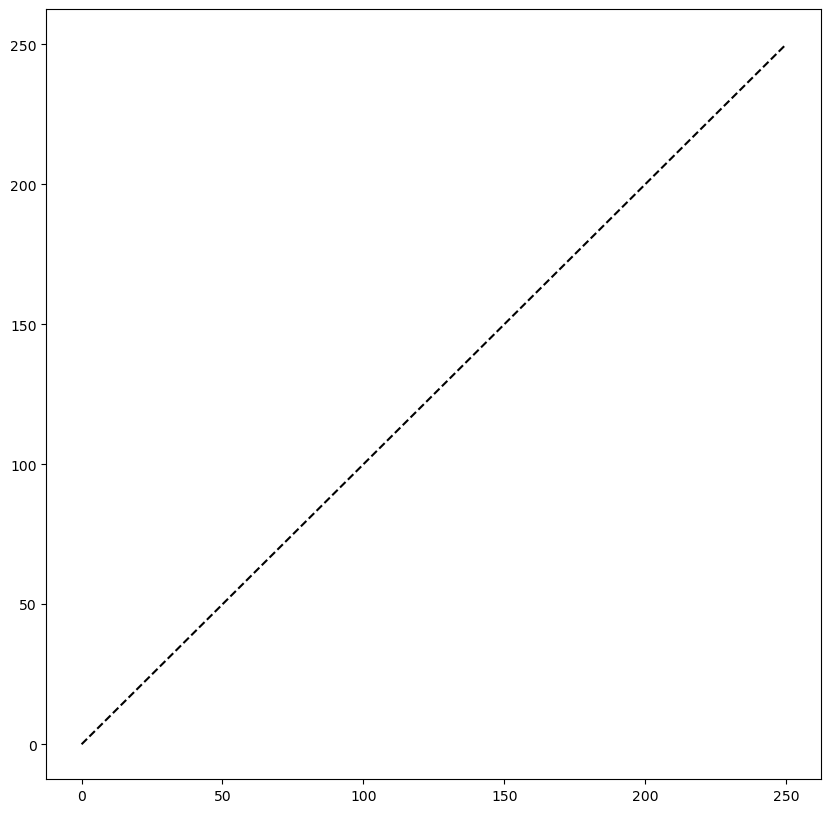

In [7]:
replace_dict = {"Chiral": "MPNN$_{chiral}$", "Nonchiral": "MPNN$_{achiral}$"}
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.plot([0, 250], [0, 250], linestyle="--", color='k')

scatter_params = {"s": 120}

df = ind_df.copy().reset_index(drop=True)
df.loc[:, "Model"] = df.Model.apply(lambda s: replace_dict[s])

markers = {"MPNN$_{chiral}$": "o", "MPNN$_{achiral}$": "o"}
sns.scatterplot(x="Tm", y="Tm_pred", data=df[df.model_id == 0], style="Model", markers=markers, hue="Model", palette=["#007a33", "#00a6de"], **scatter_params)

label_size = 35
tick_size = 25
label_font = 20


ax.legend(loc='best',markerscale=1.5, fontsize=label_font)
# ax.legend(labels=["MPNN$_{none}$", "MPNN$_{all}$"])

ax.set_xlabel("$T_m$ Experimental (°C)", fontsize=label_size)
ax.set_ylabel("$T_m$ Validation (°C)", fontsize=label_size)
ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)
ax.set_ylim(0, 250)
ax.set_xlim(0, 250)

plt.savefig("val_with_and_without.png", dpi=300, bbox_inches="tight")

# Get Barplot

In [4]:
kfold_err_df = pd.read_csv("../../Data/dataframes/kfold_err_df.csv")
full_err_df = pd.read_csv("../../Data/dataframes/full_err_df.csv")
kfold_err_melt_df = kfold_err_df.melt(id_vars=["model", "model_id"], value_vars=["Tm_MAE", "Tg_MAE", "Tm_RMSE", "Tg_RMSE"])

order_map = ["MPNN_global_pm_no_ctag", "MPNN_global_pm", "MPNN_ctag", "MPNN_no_chiral"]
order_map = {k: i for i, k in enumerate(order_map)}

df = kfold_err_melt_df.copy()
df.loc[:, "model"] = df.model.map(lambda s: replace_dict[s] if s in replace_dict.keys() else None)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

df_plot = kfold_err_melt_df[kfold_err_melt_df.model.str.contains("|".join([i + "$" for i in order_map]))].copy()
df_plot.loc[:, "model"] = df_plot.model.apply(lambda s: replace_dict[s])
df_plot.loc[:, "variable"] = df_plot.variable.apply(lambda s: replace_var_dict[s])
order_map = {replace_dict[k]: i for i, k in enumerate(order_map)}

# Actual Plot Stuff
# sns.barplot(y="value", x="model", hue="variable", data=kfold_err_melt_df)#, order=["Tg_MAE", "Tm_MAE", "Tg_RMSE", "Tm_RMSE"], ax=ax)
sns.barplot(y="value",
            x="variable",
            data=df_plot,
            ax=ax,
            palette=sns.color_palette("Paired"),
            hue="model",
            hue_order=order_map.keys(),
            order=["T$_{g}$ MAE", "T$_{m}$ MAE"],#, "Tg_RMSE", "Tm_RMSE"],
            edgecolor="white"
           )
# Legend Stuff
ax.legend(ncol=2, fontsize=14)

ax.set_ylabel("Error (°C)")
ax.set_xlabel("")
# ax.set_xticklabels(["T$_{g}$ MAE", "T$_{m}$ MAE", "T$_{g}$ RMSE", "T$_{m}$ RMSE",])

# ax.set_yscale("log")
ax.legend(ncol=2, fontsize=20)
label_size = 35
tick_size = 30
ax.set_ylabel("Mean Absolute Error (°C)", fontsize=label_size)
ax.set_xticklabels(["T$_g$", "T$_m$"])
# ax.set_xlabel(fontsize=label_size)
ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)

plt.savefig("MPNN_allchiral_nonchiral_results.png", dpi=300)
# ax.set_ylim(0, 400)
# ax.set_xlim(0, 400)

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/dataframes/kfold_err_df.csv'

# Both

In [24]:
df.head()

,smiles_polymer,smiles_monomer,monomers,pm,Mn,Tg,Tm,Tm_pred,Tg_pred,model_id,distribution,ref,comment,mechanism,monomers.1,DP,replicate_structure,dTm,dTg,Model
0,C[C@H](O)C(=O)O[C@H](C)C(=O)O[C@@H](C)C(=O)O[C...,C[C@@H](O)C(=O)O.C[C@H](O)C(=O)O,"('C[C@@H](O)C(=O)O', 'C[C@H](O)C(=O)O')",0.04,NaN,34.0,151.0,151.47183,37.482140,3,[],"Chile, L. E., Mehrkhodavandi, P., & Hatzikiria...","Table 2,#4",ester_stereo,"('C[C@@H](O)C(=O)O', 'C[C@H](O)C(=O)O')",25,0,0.47183,18.070843,MPNN$_{pm}$
1,C[C@H](OC(=O)[C@@H](C)OC(=O)[C@@H](C)OC(=O)[C@...,C[C@@H](O)C(=O)O.C[C@H](O)C(=O)O,"('C[C@@H](O)C(=O)O', 'C[C@H](O)C(=O)O')",0.04,191205.0,37.9,NaN,151.60693,37.467037,3,[],"Chile, L. E., Mehrkhodavandi, P., & Hatzikiria...","Table 2,#2",ester_stereo,"('C[C@@H](O)C(=O)O', 'C[C@H](O)C(=O)O')",25,0,NaN,14.170843,MPNN$_{pm}$
2,C[C@H](O)C(=O)O[C@H](C)C(=O)O[C@@H](C)C(=O)O[C...,C[C@@H](O)C(=O)O.C[C@H](O)C(=O)O,"('C[C@@H](O)C(=O)O', 'C[C@H](O)C(=O)O')",0.04,NaN,34.0,151.0,151.42511,37.474342,3,[],"Chile, L. E., Mehrkhodavandi, P., & Hatzikiria...","Table 2,#4",ester_stereo,"('C[C@@H](O)C(=O)O', 'C[C@H](O)C(=O)O')",25,1,0.42511,18.070843,MPNN$_{pm}$
3,C[C@H](OC(=O)[C@@H](C)OC(=O)[C@H](C)OC(=O)[C@@...,C[C@@H](O)C(=O)O.C[C@H](O)C(=O)O,"('C[C@@H](O)C(=O)O', 'C[C@H](O)C(=O)O')",0.04,191205.0,37.9,NaN,151.56602,37.460827,3,[],"Chile, L. E., Mehrkhodavandi, P., & Hatzikiria...","Table 2,#2",ester_stereo,"('C[C@@H](O)C(=O)O', 'C[C@H](O)C(=O)O')",25,1,NaN,14.170843,MPNN$_{pm}$
4,C[C@H](OC(=O)[C@@H](C)OC(=O)[C@H](C)OC(=O)[C@@...,C[C@@H](O)C(=O)O.C[C@H](O)C(=O)O,"('C[C@@H](O)C(=O)O', 'C[C@H](O)C(=O)O')",0.04,NaN,34.0,151.0,151.60399,37.467987,3,[],"Chile, L. E., Mehrkhodavandi, P., & Hatzikiria...","Table 2,#4",ester_stereo,"('C[C@@H](O)C(=O)O', 'C[C@H](O)C(=O)O')",25,2,0.60399,18.070843,MPNN$_{pm}$


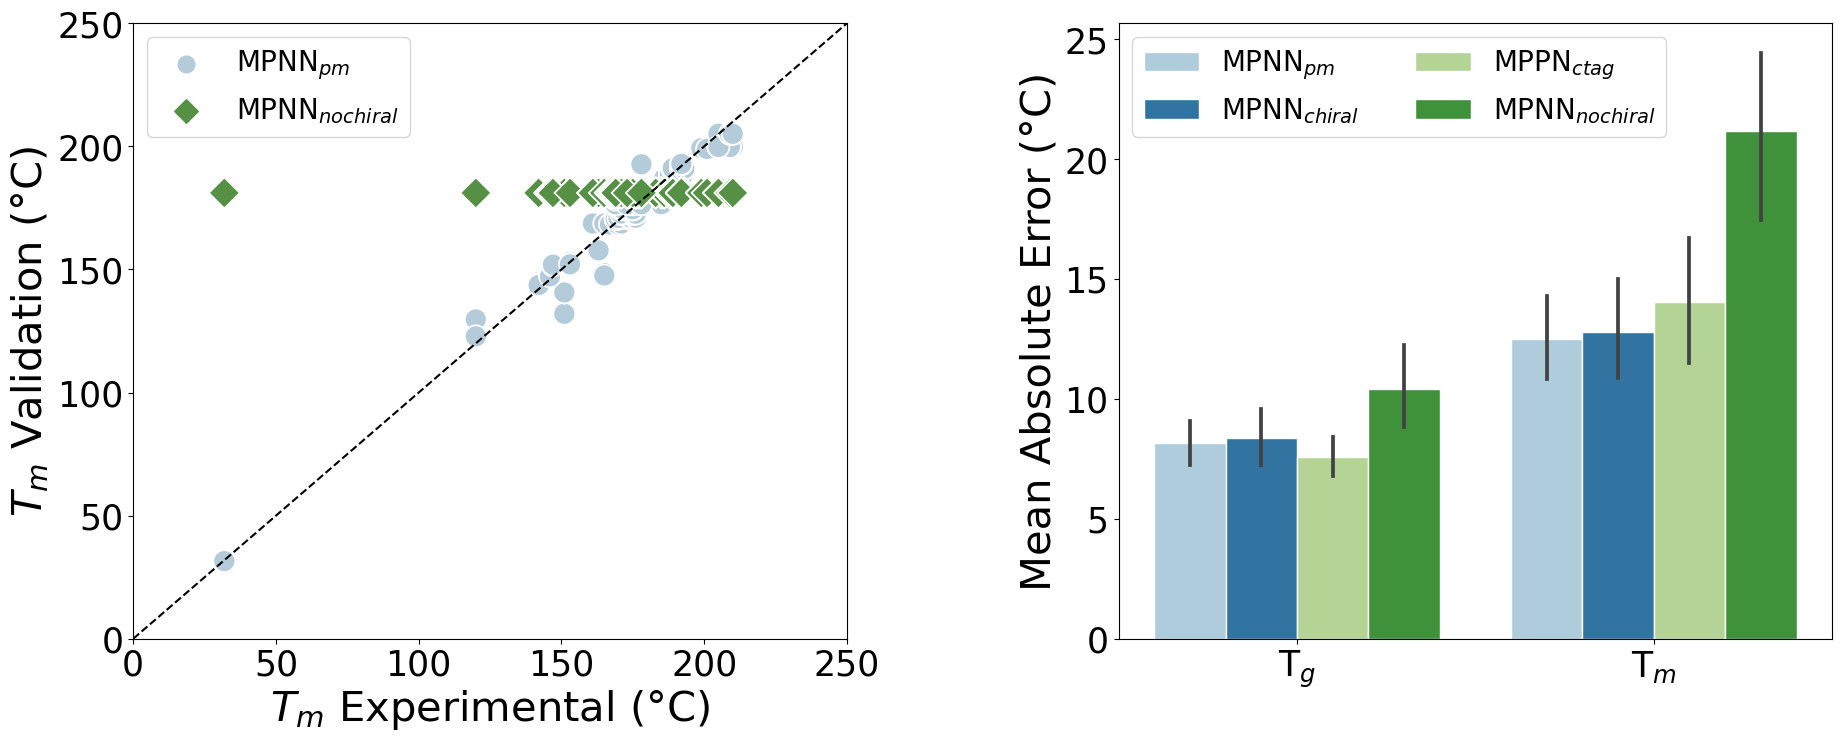

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(21, 10))

ax = axs[0]
ax.plot([0, 250], [0, 250], linestyle="--", color='k')

scatter_params = {"s": 250}

df = ind_df.copy().reset_index(drop=True)
df.loc[:, "Model"] = df.Model.apply(lambda s: replace_dict[s])

markers = {"MPNN$_{pm}$": "o", "MPNN$_{nochiral}$": "D"}
sns.scatterplot(x="Tm", y="Tm_pred", data=df[df.model_id == 0], style="Model",
                markers=markers, hue="Model", palette=["#B4CBD9", "#569045"],
                **scatter_params,
                ax=axs[0]
            )

label_size = 30
tick_size = 25
label_font = 20

ax.legend(loc='best',markerscale=2, fontsize=label_font)
# ax.legend(labels=["MPNN$_{none}$", "MPNN$_{all}$"])

ax.set_xlabel("$T_m$ Experimental (°C)", fontsize=label_size)
ax.set_ylabel("$T_m$ Validation (°C)", fontsize=label_size)
ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)
ax.set_ylim(0, 250)
ax.set_xlim(0, 250)
# ax.set_aspect('equal')

########################################
kfold_err_df = pd.read_csv("../../Data/dataframes/kfold_err_df.csv")
full_err_df = pd.read_csv("../../Data/dataframes/full_err_df.csv")
kfold_err_melt_df = kfold_err_df.melt(id_vars=["model", "model_id"], value_vars=["Tm_MAE", "Tg_MAE", "Tm_RMSE", "Tg_RMSE"])

order_map = ["MPNN_global_pm_no_ctag", "MPNN_global_pm", "MPNN_ctag", "MPNN_no_chiral"]
order_map = {k: i for i, k in enumerate(order_map)}

df = kfold_err_melt_df.copy()
df.loc[:, "model"] = df.model.map(lambda s: replace_dict[s] if s in replace_dict.keys() else None)

df_plot = kfold_err_melt_df[kfold_err_melt_df.model.str.contains("|".join([i + "$" for i in order_map]))].copy()
df_plot.loc[:, "model"] = df_plot.model.apply(lambda s: replace_dict[s])
df_plot.loc[:, "variable"] = df_plot.variable.apply(lambda s: replace_var_dict[s])
order_map = {replace_dict[k]: i for i, k in enumerate(order_map)}



# Actual Plot Stuff
# sns.barplot(y="value", x="model", hue="variable", data=kfold_err_melt_df)#, order=["Tg_MAE", "Tm_MAE", "Tg_RMSE", "Tm_RMSE"], ax=ax)
ax = axs[1]
sns.barplot(y="value",
            x="variable",
            data=df_plot,
            ax=ax,
            palette=sns.color_palette("Paired"),
            hue="model",
            hue_order=order_map.keys(),
            order=["T$_{g}$ MAE", "T$_{m}$ MAE"],#, "Tg_RMSE", "Tm_RMSE"],
            edgecolor="white"
           )

ax.set_ylabel("Error (°C)")
ax.set_xlabel("")
# ax.set_xticklabels(["T$_{g}$ MAE", "T$_{m}$ MAE", "T$_{g}$ RMSE", "T$_{m}$ RMSE",])

# ax.set_yscale("log")
ax.legend(ncol=2, fontsize=label_font)

ax.set_ylabel("Mean Absolute Error (°C)", fontsize=label_size)
ax.set_xticklabels(["T$_g$", "T$_m$"])
# ax.set_xlabel(fontsize=label_size)
ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)
# ax.set_aspect('equal')

# plt.savefig("MPNN_allchiral_nonchiral_results.png", dpi=300)
# ax.set_ylim(0, 400)
# ax.set_xlim(0, 400)

fig.tight_layout(pad=10)